## 交通流最適化

In [34]:
import blueqat.opt as wq
import numpy as np

In [35]:
#入力セル

pu_cost_matrix = [[1,1,0,1,1,0],[1,1,0,1,1,0],[1,0,0,1,0,0],[1,0,0,1,0,0],[0,1,0,0,1,0],[0,1,1,0,1,1],[0,0,1,0,0,1],[0,0,1,0,0,1],[0,0,1,0,0,1]]
print("Number of cars：")
pu_cars_size = int(input()) #2
pu_roots_size = int(len(pu_cost_matrix[0])/pu_cars_size)
print("The cost of constraint:")
pu_K = float(input()) #　10

Number of cars：
2
The cost of constraint:
10


In [36]:
#コスト関数：第１項
def get_traffic_qubo(cars_size, roots_size, K):
    qubo_size = cars_size*roots_size
    traffic_qubo = np.zeros((qubo_size, qubo_size))
    indices = [(u, v, i, j) for u in range(cars_size) for v in range(cars_size) for i in range(roots_size) for j in range(roots_size)]
    for u, v, i, j in indices:
        ui = u * roots_size + i
        vj = v * roots_size + j
        if ui > vj:
            continue
        if ui == vj:
            traffic_qubo[ui][vj] -= K
        if u == v and i != j:
            traffic_qubo[ui][vj] += 2 * K
    return traffic_qubo
traffic_qubo = get_traffic_qubo(pu_cars_size, pu_roots_size, pu_K)

In [37]:
#コスト関数：第２項
def get_traffic_cost_qubo(cost_matrix):
    traffic_cost_qubo = np.zeros((len(cost_matrix[0]), len(cost_matrix[0])))
    for i in range(len(cost_matrix)):
        traffic_cost_qubo += wq.sqr(cost_matrix[i])
    return traffic_cost_qubo
traffic_cost_qubo = get_traffic_cost_qubo(pu_cost_matrix)

In [38]:
#観測
def get_traffic_optimisation(traffic_qubo, traffic_cost_qubo):
    a = wq.opt()
    a.qubo = traffic_qubo + traffic_cost_qubo
#     print(a.qubo)
    answer = a.sa()
    print(answer)
    a.plot()
    return answer

In [39]:
#ハミルトニアンの検証
def calculate_H_f(q, cost_matrix):
    H_f = 0
    for vi in range(len(q)):
        if q[vi] == 1:
            H_list = []
            for k in range(len(cost_matrix)):
                H_list.append(cost_matrix[k][vi])
            np.square(H_list)
            H_f += np.sum(H_list)
    print(H_f)
    return H_f

def calculate_H_s(q, cars_size, roots_size):
    H_s = 0
    for v in range(cars_size):
        sum_x = 0
        for i in range(roots_size):
            index = v * roots_size + i
            sum_x += q[index]
        H_s += (1 - sum_x) ** 2
    print(H_s)
    return H_s
 
def calculate_H(q, cities_size, cost_matrix, roots_size, K):
    print("hamiltonian_f =")
    H_f = calculate_H_f(q, cost_matrix)
    print("hamiltonian_s =")
    H_s = calculate_H_s(q, cities_size, roots_size)
    H =   H_f + H_s * K
    print("hamiltonian =")
    print(H)
    return H

[0, 0, 1, 1, 0, 0]


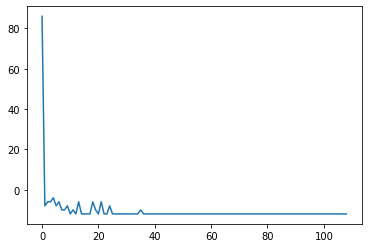

hamiltonian_f =
8
hamiltonian_s =
0
hamiltonian =
8.0


8.0

In [40]:
#出力セル
traffic_qubo = get_traffic_qubo(pu_cars_size, pu_roots_size, pu_K)
traffic_cost_qubo = get_traffic_cost_qubo(pu_cost_matrix)
q = get_traffic_optimisation(traffic_qubo, traffic_cost_qubo)
calculate_H(q, pu_cars_size, pu_cost_matrix, pu_roots_size, pu_K)